# Create a web service that uses machine learning to make predictions based on a data set 'powerproduction'

### From the 'powerproduction' data set, produce a model that accurately predicts wind turbine power output from wind speed values. Then, develop a web service that will respond with predicted power values based on speed values sent as HTTP requests


### Imports
##### tensorflow
tesnorflow is an open-source library developed by Google which is used for deep learning applications. I use tensorflows Keras module, which is a deep learning API written in Python. Tensorflow is a good way of creating neural networks.

##### numpy
numpy is a module for python which makes working with arrays a lot easier.

#### pandas
pandas offers data structures and operations for manipulating numerical tables. pandas is used for data manipulation and analysis.

#### matplotlib
matplot lib is a plotting library that works with numpy to plot data. pyplot contains well defined plotting functions.


In [1]:
import tensorflow as tf
import tensorflow.keras as kr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

#### Load the powerproduction data set with a percision of 2

- https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.set_printoptions.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

- print data to screen to see if data was loaded in

In [8]:
np.set_printoptions(precision=2, suppress=True)

data = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
data

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


#### Plot the data to a scatter plot to see how our data set looks

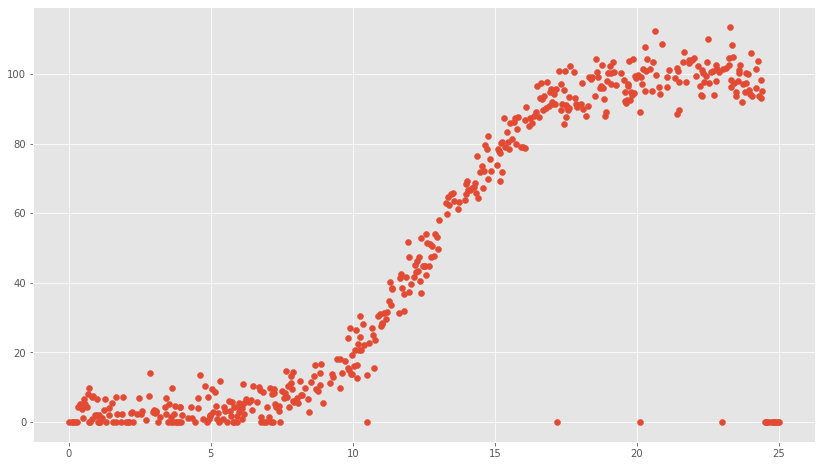

In [3]:
# remove last 10 variables containing 0 (outliers)

plt.scatter(data.speed, data.power)

### Train a model to use for plotting predicted data with actual data
- Set the model to be a squential keras model - with sequential models, there is 1 input tensor and 1 output tensor
- I added an extra, dense layer with a density of 64 to seperate plotted data a bit more
- Added the Adam optimizer. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters". (https://keras.io/api/optimizers/adam/)



https://keras.io/api/models/sequential/

In [4]:
model = kr.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mse')

model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

### Iterate over the dataset, training the model to fit the prediction data as accurately as possible

In [5]:
# Train the model via running multiple times
model.fit(data['speed'], data['power'], epochs=25000, batch_size=500)

Epoch 1/25000
1/1 [==============================] - 0s 376ms/step - loss: 4222.3525
Epoch 2/25000
1/1 [==============================] - 0s 3ms/step - loss: 4211.9849
Epoch 3/25000
1/1 [==============================] - 0s 2ms/step - loss: 4201.6445
Epoch 4/25000
1/1 [==============================] - 0s 2ms/step - loss: 4191.3296
Epoch 5/25000
1/1 [==============================] - 0s 2ms/step - loss: 4181.0435
Epoch 6/25000
1/1 [==============================] - 0s 1ms/step - loss: 4170.7876
Epoch 7/25000
1/1 [==============================] - 0s 2ms/step - loss: 4160.5645
Epoch 8/25000
1/1 [==============================] - 0s 2ms/step - loss: 4150.3770
Epoch 9/25000
1/1 [==============================] - 0s 2ms/step - loss: 4140.2256
Epoch 10/25000
1/1 [==============================] - 0s 2ms/step - loss: 4130.1128
Epoch 11/25000
1/1 [==============================] - 0s 3ms/step - loss: 4120.0391
Epoch 12/25000
1/1 [==============================] - 0s 2ms/step - loss: 4110.0054

1/1 [==============================] - 0s 2ms/step - loss: 3243.6479
Epoch 195/25000
1/1 [==============================] - 0s 2ms/step - loss: 3241.3142
Epoch 196/25000
1/1 [==============================] - 0s 2ms/step - loss: 3238.9861
Epoch 197/25000
1/1 [==============================] - 0s 2ms/step - loss: 3236.6631
Epoch 198/25000
1/1 [==============================] - 0s 2ms/step - loss: 3234.3457
Epoch 199/25000
1/1 [==============================] - 0s 2ms/step - loss: 3232.0337
Epoch 200/25000
1/1 [==============================] - 0s 1ms/step - loss: 3229.7275
Epoch 201/25000
1/1 [==============================] - 0s 2ms/step - loss: 3227.4260
Epoch 202/25000
1/1 [==============================] - 0s 2ms/step - loss: 3225.1299
Epoch 203/25000
1/1 [==============================] - 0s 1ms/step - loss: 3222.8394
Epoch 204/25000
1/1 [==============================] - 0s 2ms/step - loss: 3220.5535
Epoch 205/25000
1/1 [==============================] - 0s 2ms/step - loss: 3218.2

1/1 [==============================] - 0s 1ms/step - loss: 2861.4507
Epoch 387/25000
1/1 [==============================] - 0s 2ms/step - loss: 2859.7168
Epoch 388/25000
1/1 [==============================] - 0s 2ms/step - loss: 2857.9854
Epoch 389/25000
1/1 [==============================] - 0s 2ms/step - loss: 2856.2563
Epoch 390/25000
1/1 [==============================] - 0s 2ms/step - loss: 2854.5288
Epoch 391/25000
1/1 [==============================] - 0s 3ms/step - loss: 2852.8037
Epoch 392/25000
1/1 [==============================] - 0s 1ms/step - loss: 2851.0811
Epoch 393/25000
1/1 [==============================] - 0s 1ms/step - loss: 2849.3606
Epoch 394/25000
1/1 [==============================] - 0s 2ms/step - loss: 2847.6423
Epoch 395/25000
1/1 [==============================] - 0s 2ms/step - loss: 2845.9260
Epoch 396/25000
1/1 [==============================] - 0s 2ms/step - loss: 2844.2119
Epoch 397/25000
1/1 [==============================] - 0s 2ms/step - loss: 2842.5

1/1 [==============================] - 0s 2ms/step - loss: 2565.5767
Epoch 579/25000
1/1 [==============================] - 0s 2ms/step - loss: 2564.2151
Epoch 580/25000
1/1 [==============================] - 0s 2ms/step - loss: 2562.8545
Epoch 581/25000
1/1 [==============================] - 0s 2ms/step - loss: 2561.4961
Epoch 582/25000
1/1 [==============================] - 0s 1ms/step - loss: 2560.1392
Epoch 583/25000
1/1 [==============================] - 0s 2ms/step - loss: 2558.7842
Epoch 584/25000
1/1 [==============================] - 0s 2ms/step - loss: 2557.4304
Epoch 585/25000
1/1 [==============================] - 0s 2ms/step - loss: 2556.0789
Epoch 586/25000
1/1 [==============================] - 0s 3ms/step - loss: 2554.7290
Epoch 587/25000
1/1 [==============================] - 0s 2ms/step - loss: 2553.3809
Epoch 588/25000
1/1 [==============================] - 0s 2ms/step - loss: 2552.0339
Epoch 589/25000
1/1 [==============================] - 0s 2ms/step - loss: 2550.6

1/1 [==============================] - 0s 1ms/step - loss: 2332.7466
Epoch 771/25000
1/1 [==============================] - 0s 2ms/step - loss: 2331.6609
Epoch 772/25000
1/1 [==============================] - 0s 2ms/step - loss: 2330.5764
Epoch 773/25000
1/1 [==============================] - 0s 2ms/step - loss: 2329.4927
Epoch 774/25000
1/1 [==============================] - 0s 2ms/step - loss: 2328.4097
Epoch 775/25000
1/1 [==============================] - 0s 2ms/step - loss: 2327.3274
Epoch 776/25000
1/1 [==============================] - 0s 2ms/step - loss: 2326.2461
Epoch 777/25000
1/1 [==============================] - 0s 2ms/step - loss: 2325.1653
Epoch 778/25000
1/1 [==============================] - 0s 1ms/step - loss: 2324.0850
Epoch 779/25000
1/1 [==============================] - 0s 2ms/step - loss: 2323.0059
Epoch 780/25000
1/1 [==============================] - 0s 2ms/step - loss: 2321.9268
Epoch 781/25000
1/1 [==============================] - 0s 2ms/step - loss: 2320.8

1/1 [==============================] - 0s 2ms/step - loss: 2093.2317
Epoch 963/25000
1/1 [==============================] - 0s 2ms/step - loss: 2091.5361
Epoch 964/25000
1/1 [==============================] - 0s 2ms/step - loss: 2089.8293
Epoch 965/25000
1/1 [==============================] - 0s 2ms/step - loss: 2088.1113
Epoch 966/25000
1/1 [==============================] - 0s 1ms/step - loss: 2086.3818
Epoch 967/25000
1/1 [==============================] - 0s 2ms/step - loss: 2084.6416
Epoch 968/25000
1/1 [==============================] - 0s 1ms/step - loss: 2082.8904
Epoch 969/25000
1/1 [==============================] - 0s 2ms/step - loss: 2081.1287
Epoch 970/25000
1/1 [==============================] - 0s 1ms/step - loss: 2079.3564
Epoch 971/25000
1/1 [==============================] - 0s 3ms/step - loss: 2077.5745
Epoch 972/25000
1/1 [==============================] - 0s 2ms/step - loss: 2075.7825
Epoch 973/25000
1/1 [==============================] - 0s 3ms/step - loss: 2073.9

1/1 [==============================] - 0s 2ms/step - loss: 1744.1184
Epoch 1153/25000
1/1 [==============================] - 0s 2ms/step - loss: 1742.5674
Epoch 1154/25000
1/1 [==============================] - 0s 2ms/step - loss: 1741.0190
Epoch 1155/25000
1/1 [==============================] - 0s 1ms/step - loss: 1739.4733
Epoch 1156/25000
1/1 [==============================] - 0s 2ms/step - loss: 1737.9301
Epoch 1157/25000
1/1 [==============================] - 0s 1ms/step - loss: 1736.3894
Epoch 1158/25000
1/1 [==============================] - 0s 3ms/step - loss: 1734.8511
Epoch 1159/25000
1/1 [==============================] - 0s 2ms/step - loss: 1733.3153
Epoch 1160/25000
1/1 [==============================] - 0s 2ms/step - loss: 1731.7821
Epoch 1161/25000
1/1 [==============================] - 0s 2ms/step - loss: 1730.2513
Epoch 1162/25000
1/1 [==============================] - 0s 1ms/step - loss: 1728.7229
Epoch 1163/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 1459.2802
Epoch 1343/25000
1/1 [==============================] - 0s 3ms/step - loss: 1457.9730
Epoch 1344/25000
1/1 [==============================] - 0s 2ms/step - loss: 1456.6676
Epoch 1345/25000
1/1 [==============================] - 0s 2ms/step - loss: 1455.3641
Epoch 1346/25000
1/1 [==============================] - 0s 2ms/step - loss: 1454.0620
Epoch 1347/25000
1/1 [==============================] - 0s 3ms/step - loss: 1452.7617
Epoch 1348/25000
1/1 [==============================] - 0s 3ms/step - loss: 1451.4635
Epoch 1349/25000
1/1 [==============================] - 0s 2ms/step - loss: 1450.1666
Epoch 1350/25000
1/1 [==============================] - 0s 1ms/step - loss: 1448.8713
Epoch 1351/25000
1/1 [==============================] - 0s 1ms/step - loss: 1447.5781
Epoch 1352/25000
1/1 [==============================] - 0s 1ms/step - loss: 1446.2860
Epoch 1353/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 1236.6763
Epoch 1533/25000
1/1 [==============================] - 0s 1ms/step - loss: 1235.6208
Epoch 1534/25000
1/1 [==============================] - 0s 2ms/step - loss: 1234.5664
Epoch 1535/25000
1/1 [==============================] - 0s 1ms/step - loss: 1233.5129
Epoch 1536/25000
1/1 [==============================] - 0s 2ms/step - loss: 1232.4608
Epoch 1537/25000
1/1 [==============================] - 0s 3ms/step - loss: 1231.4098
Epoch 1538/25000
1/1 [==============================] - 0s 2ms/step - loss: 1230.3595
Epoch 1539/25000
1/1 [==============================] - 0s 3ms/step - loss: 1229.3104
Epoch 1540/25000
1/1 [==============================] - 0s 2ms/step - loss: 1228.2623
Epoch 1541/25000
1/1 [==============================] - 0s 2ms/step - loss: 1227.2153
Epoch 1542/25000
1/1 [==============================] - 0s 2ms/step - loss: 1226.1694
Epoch 1543/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 1053.6512
Epoch 1723/25000
1/1 [==============================] - 0s 1ms/step - loss: 1052.7747
Epoch 1724/25000
1/1 [==============================] - 0s 2ms/step - loss: 1051.8988
Epoch 1725/25000
1/1 [==============================] - 0s 1ms/step - loss: 1051.0238
Epoch 1726/25000
1/1 [==============================] - 0s 1ms/step - loss: 1050.1497
Epoch 1727/25000
1/1 [==============================] - 0s 2ms/step - loss: 1049.2764
Epoch 1728/25000
1/1 [==============================] - 0s 2ms/step - loss: 1048.4039
Epoch 1729/25000
1/1 [==============================] - 0s 2ms/step - loss: 1047.5322
Epoch 1730/25000
1/1 [==============================] - 0s 1ms/step - loss: 1046.6616
Epoch 1731/25000
1/1 [==============================] - 0s 2ms/step - loss: 1045.7916
Epoch 1732/25000
1/1 [==============================] - 0s 2ms/step - loss: 1044.9225
Epoch 1733/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 900.5677
Epoch 1914/25000
1/1 [==============================] - 0s 2ms/step - loss: 899.8373
Epoch 1915/25000
1/1 [==============================] - 0s 2ms/step - loss: 899.1077
Epoch 1916/25000
1/1 [==============================] - 0s 2ms/step - loss: 898.3788
Epoch 1917/25000
1/1 [==============================] - 0s 2ms/step - loss: 897.6506
Epoch 1918/25000
1/1 [==============================] - 0s 3ms/step - loss: 896.9230
Epoch 1919/25000
1/1 [==============================] - 0s 2ms/step - loss: 896.1962
Epoch 1920/25000
1/1 [==============================] - 0s 2ms/step - loss: 895.4699
Epoch 1921/25000
1/1 [==============================] - 0s 3ms/step - loss: 894.7446
Epoch 1922/25000
1/1 [==============================] - 0s 1ms/step - loss: 894.0197
Epoch 1923/25000
1/1 [==============================] - 0s 1ms/step - loss: 893.2957
Epoch 1924/25000
1/1 [==============================] - 0s 3ms/step - loss: 892.57

1/1 [==============================] - 0s 1ms/step - loss: 772.3511
Epoch 2106/25000
1/1 [==============================] - 0s 1ms/step - loss: 771.7427
Epoch 2107/25000
1/1 [==============================] - 0s 2ms/step - loss: 771.1350
Epoch 2108/25000
1/1 [==============================] - 0s 1ms/step - loss: 770.5279
Epoch 2109/25000
1/1 [==============================] - 0s 1ms/step - loss: 769.9213
Epoch 2110/25000
1/1 [==============================] - 0s 2ms/step - loss: 769.3154
Epoch 2111/25000
1/1 [==============================] - 0s 2ms/step - loss: 768.7101
Epoch 2112/25000
1/1 [==============================] - 0s 1ms/step - loss: 768.1052
Epoch 2113/25000
1/1 [==============================] - 0s 2ms/step - loss: 767.5010
Epoch 2114/25000
1/1 [==============================] - 0s 2ms/step - loss: 766.8975
Epoch 2115/25000
1/1 [==============================] - 0s 3ms/step - loss: 766.2943
Epoch 2116/25000
1/1 [==============================] - 0s 1ms/step - loss: 765.69

1/1 [==============================] - 0s 2ms/step - loss: 665.6277
Epoch 2298/25000
1/1 [==============================] - 0s 3ms/step - loss: 665.1219
Epoch 2299/25000
1/1 [==============================] - 0s 1ms/step - loss: 664.6166
Epoch 2300/25000
1/1 [==============================] - 0s 1ms/step - loss: 664.1119
Epoch 2301/25000
1/1 [==============================] - 0s 2ms/step - loss: 663.6076
Epoch 2302/25000
1/1 [==============================] - 0s 2ms/step - loss: 663.1039
Epoch 2303/25000
1/1 [==============================] - 0s 1ms/step - loss: 662.6006
Epoch 2304/25000
1/1 [==============================] - 0s 2ms/step - loss: 662.0978
Epoch 2305/25000
1/1 [==============================] - 0s 1ms/step - loss: 661.5954
Epoch 2306/25000
1/1 [==============================] - 0s 2ms/step - loss: 661.0938
Epoch 2307/25000
1/1 [==============================] - 0s 2ms/step - loss: 660.5923
Epoch 2308/25000
1/1 [==============================] - 0s 1ms/step - loss: 660.09

1/1 [==============================] - 0s 2ms/step - loss: 577.0877
Epoch 2490/25000
1/1 [==============================] - 0s 2ms/step - loss: 576.6693
Epoch 2491/25000
1/1 [==============================] - 0s 1ms/step - loss: 576.2513
Epoch 2492/25000
1/1 [==============================] - 0s 2ms/step - loss: 575.8339
Epoch 2493/25000
1/1 [==============================] - 0s 1ms/step - loss: 575.4168
Epoch 2494/25000
1/1 [==============================] - 0s 2ms/step - loss: 575.0002
Epoch 2495/25000
1/1 [==============================] - 0s 2ms/step - loss: 574.5839
Epoch 2496/25000
1/1 [==============================] - 0s 2ms/step - loss: 574.1682
Epoch 2497/25000
1/1 [==============================] - 0s 2ms/step - loss: 573.7527
Epoch 2498/25000
1/1 [==============================] - 0s 2ms/step - loss: 573.3378
Epoch 2499/25000
1/1 [==============================] - 0s 3ms/step - loss: 572.9233
Epoch 2500/25000
1/1 [==============================] - 0s 2ms/step - loss: 572.50

1/1 [==============================] - 0s 2ms/step - loss: 504.1372
Epoch 2682/25000
1/1 [==============================] - 0s 1ms/step - loss: 503.7943
Epoch 2683/25000
1/1 [==============================] - 0s 2ms/step - loss: 503.4517
Epoch 2684/25000
1/1 [==============================] - 0s 1ms/step - loss: 503.1093
Epoch 2685/25000
1/1 [==============================] - 0s 2ms/step - loss: 502.7674
Epoch 2686/25000
1/1 [==============================] - 0s 1ms/step - loss: 502.4259
Epoch 2687/25000
1/1 [==============================] - 0s 1ms/step - loss: 502.0847
Epoch 2688/25000
1/1 [==============================] - 0s 1ms/step - loss: 501.7439
Epoch 2689/25000
1/1 [==============================] - 0s 1ms/step - loss: 501.4034
Epoch 2690/25000
1/1 [==============================] - 0s 1ms/step - loss: 501.0633
Epoch 2691/25000
1/1 [==============================] - 0s 2ms/step - loss: 500.7235
Epoch 2692/25000
1/1 [==============================] - 0s 1ms/step - loss: 500.38

1/1 [==============================] - 0s 2ms/step - loss: 444.6441
Epoch 2874/25000
1/1 [==============================] - 0s 2ms/step - loss: 444.3661
Epoch 2875/25000
1/1 [==============================] - 0s 1ms/step - loss: 444.0884
Epoch 2876/25000
1/1 [==============================] - 0s 2ms/step - loss: 443.8112
Epoch 2877/25000
1/1 [==============================] - 0s 5ms/step - loss: 443.5341
Epoch 2878/25000
1/1 [==============================] - 0s 2ms/step - loss: 443.2574
Epoch 2879/25000
1/1 [==============================] - 0s 3ms/step - loss: 442.9809
Epoch 2880/25000
1/1 [==============================] - 0s 2ms/step - loss: 442.7048
Epoch 2881/25000
1/1 [==============================] - 0s 2ms/step - loss: 442.4290
Epoch 2882/25000
1/1 [==============================] - 0s 3ms/step - loss: 442.1535
Epoch 2883/25000
1/1 [==============================] - 0s 3ms/step - loss: 441.8783
Epoch 2884/25000
1/1 [==============================] - 0s 2ms/step - loss: 441.60

1/1 [==============================] - 0s 2ms/step - loss: 396.7394
Epoch 3066/25000
1/1 [==============================] - 0s 3ms/step - loss: 396.5172
Epoch 3067/25000
1/1 [==============================] - 0s 2ms/step - loss: 396.2952
Epoch 3068/25000
1/1 [==============================] - 0s 2ms/step - loss: 396.0735
Epoch 3069/25000
1/1 [==============================] - 0s 2ms/step - loss: 395.8522
Epoch 3070/25000
1/1 [==============================] - 0s 2ms/step - loss: 395.6311
Epoch 3071/25000
1/1 [==============================] - 0s 3ms/step - loss: 395.4101
Epoch 3072/25000
1/1 [==============================] - 0s 1ms/step - loss: 395.1895
Epoch 3073/25000
1/1 [==============================] - 0s 2ms/step - loss: 394.9692
Epoch 3074/25000
1/1 [==============================] - 0s 2ms/step - loss: 394.7491
Epoch 3075/25000
1/1 [==============================] - 0s 2ms/step - loss: 394.5294
Epoch 3076/25000
1/1 [==============================] - 0s 3ms/step - loss: 394.30

1/1 [==============================] - 0s 2ms/step - loss: 358.7229
Epoch 3258/25000
1/1 [==============================] - 0s 2ms/step - loss: 358.5480
Epoch 3259/25000
1/1 [==============================] - 0s 1ms/step - loss: 358.3733
Epoch 3260/25000
1/1 [==============================] - 0s 2ms/step - loss: 358.1988
Epoch 3261/25000
1/1 [==============================] - 0s 1ms/step - loss: 358.0246
Epoch 3262/25000
1/1 [==============================] - 0s 2ms/step - loss: 357.8505
Epoch 3263/25000
1/1 [==============================] - 0s 2ms/step - loss: 357.6766
Epoch 3264/25000
1/1 [==============================] - 0s 2ms/step - loss: 357.5031
Epoch 3265/25000
1/1 [==============================] - 0s 2ms/step - loss: 357.3297
Epoch 3266/25000
1/1 [==============================] - 0s 2ms/step - loss: 357.1566
Epoch 3267/25000
1/1 [==============================] - 0s 2ms/step - loss: 356.9836
Epoch 3268/25000
1/1 [==============================] - 0s 2ms/step - loss: 356.81

1/1 [==============================] - 0s 3ms/step - loss: 329.0103
Epoch 3450/25000
1/1 [==============================] - 0s 2ms/step - loss: 328.8747
Epoch 3451/25000
1/1 [==============================] - 0s 1ms/step - loss: 328.7392
Epoch 3452/25000
1/1 [==============================] - 0s 2ms/step - loss: 328.6039
Epoch 3453/25000
1/1 [==============================] - 0s 2ms/step - loss: 328.4688
Epoch 3454/25000
1/1 [==============================] - 0s 2ms/step - loss: 328.3338
Epoch 3455/25000
1/1 [==============================] - 0s 2ms/step - loss: 328.1991
Epoch 3456/25000
1/1 [==============================] - 0s 2ms/step - loss: 328.0646
Epoch 3457/25000
1/1 [==============================] - 0s 2ms/step - loss: 327.9302
Epoch 3458/25000
1/1 [==============================] - 0s 2ms/step - loss: 327.7960
Epoch 3459/25000
1/1 [==============================] - 0s 2ms/step - loss: 327.6620
Epoch 3460/25000
1/1 [==============================] - 0s 2ms/step - loss: 327.52

1/1 [==============================] - 0s 2ms/step - loss: 306.1067
Epoch 3642/25000
1/1 [==============================] - 0s 1ms/step - loss: 306.0028
Epoch 3643/25000
1/1 [==============================] - 0s 3ms/step - loss: 305.8990
Epoch 3644/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.7954
Epoch 3645/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.6920
Epoch 3646/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.5886
Epoch 3647/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.4854
Epoch 3648/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.3824
Epoch 3649/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.2795
Epoch 3650/25000
1/1 [==============================] - 0s 2ms/step - loss: 305.1768
Epoch 3651/25000
1/1 [==============================] - 0s 1ms/step - loss: 305.0742
Epoch 3652/25000
1/1 [==============================] - 0s 2ms/step - loss: 304.97

1/1 [==============================] - 0s 1ms/step - loss: 288.6340
Epoch 3834/25000
1/1 [==============================] - 0s 2ms/step - loss: 288.5560
Epoch 3835/25000
1/1 [==============================] - 0s 2ms/step - loss: 288.4781
Epoch 3836/25000
1/1 [==============================] - 0s 2ms/step - loss: 288.4002
Epoch 3837/25000
1/1 [==============================] - 0s 3ms/step - loss: 288.3226
Epoch 3838/25000
1/1 [==============================] - 0s 2ms/step - loss: 288.2450
Epoch 3839/25000
1/1 [==============================] - 0s 2ms/step - loss: 288.1675
Epoch 3840/25000
1/1 [==============================] - 0s 2ms/step - loss: 288.0901
Epoch 3841/25000
1/1 [==============================] - 0s 3ms/step - loss: 288.0129
Epoch 3842/25000
1/1 [==============================] - 0s 2ms/step - loss: 287.9358
Epoch 3843/25000
1/1 [==============================] - 0s 2ms/step - loss: 287.8588
Epoch 3844/25000
1/1 [==============================] - 0s 2ms/step - loss: 287.78

1/1 [==============================] - 0s 2ms/step - loss: 275.6997
Epoch 4026/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.6425
Epoch 4027/25000
1/1 [==============================] - 0s 3ms/step - loss: 275.5852
Epoch 4028/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.5281
Epoch 4029/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.4711
Epoch 4030/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.4141
Epoch 4031/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.3572
Epoch 4032/25000
1/1 [==============================] - 0s 1ms/step - loss: 275.3005
Epoch 4033/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.2439
Epoch 4034/25000
1/1 [==============================] - 0s 2ms/step - loss: 275.1873
Epoch 4035/25000
1/1 [==============================] - 0s 1ms/step - loss: 275.1308
Epoch 4036/25000
1/1 [==============================] - 0s 1ms/step - loss: 275.07

1/1 [==============================] - 0s 2ms/step - loss: 266.3136
Epoch 4218/25000
1/1 [==============================] - 0s 2ms/step - loss: 266.2726
Epoch 4219/25000
1/1 [==============================] - 0s 2ms/step - loss: 266.2316
Epoch 4220/25000
1/1 [==============================] - 0s 2ms/step - loss: 266.1907
Epoch 4221/25000
1/1 [==============================] - 0s 3ms/step - loss: 266.1499
Epoch 4222/25000
1/1 [==============================] - 0s 2ms/step - loss: 266.1091
Epoch 4223/25000
1/1 [==============================] - 0s 4ms/step - loss: 266.0684
Epoch 4224/25000
1/1 [==============================] - 0s 1ms/step - loss: 266.0278
Epoch 4225/25000
1/1 [==============================] - 0s 3ms/step - loss: 265.9872
Epoch 4226/25000
1/1 [==============================] - 0s 3ms/step - loss: 265.9467
Epoch 4227/25000
1/1 [==============================] - 0s 4ms/step - loss: 265.9063
Epoch 4228/25000
1/1 [==============================] - 0s 2ms/step - loss: 265.86

1/1 [==============================] - 0s 2ms/step - loss: 259.6788
Epoch 4410/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.6503
Epoch 4411/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.6218
Epoch 4412/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.5934
Epoch 4413/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.5649
Epoch 4414/25000
1/1 [==============================] - 0s 1ms/step - loss: 259.5367
Epoch 4415/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.5084
Epoch 4416/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.4802
Epoch 4417/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.4521
Epoch 4418/25000
1/1 [==============================] - 0s 1ms/step - loss: 259.4241
Epoch 4419/25000
1/1 [==============================] - 0s 3ms/step - loss: 259.3963
Epoch 4420/25000
1/1 [==============================] - 0s 2ms/step - loss: 259.36

1/1 [==============================] - 0s 2ms/step - loss: 255.1330
Epoch 4602/25000
1/1 [==============================] - 0s 5ms/step - loss: 255.1138
Epoch 4603/25000
1/1 [==============================] - 0s 2ms/step - loss: 255.0946
Epoch 4604/25000
1/1 [==============================] - 0s 2ms/step - loss: 255.0755
Epoch 4605/25000
1/1 [==============================] - 0s 2ms/step - loss: 255.0564
Epoch 4606/25000
1/1 [==============================] - 0s 2ms/step - loss: 255.0373
Epoch 4607/25000
1/1 [==============================] - 0s 1ms/step - loss: 255.0184
Epoch 4608/25000
1/1 [==============================] - 0s 2ms/step - loss: 254.9994
Epoch 4609/25000
1/1 [==============================] - 0s 1ms/step - loss: 254.9805
Epoch 4610/25000
1/1 [==============================] - 0s 2ms/step - loss: 254.9616
Epoch 4611/25000
1/1 [==============================] - 0s 1ms/step - loss: 254.9428
Epoch 4612/25000
1/1 [==============================] - 0s 2ms/step - loss: 254.92

1/1 [==============================] - 0s 2ms/step - loss: 252.1278
Epoch 4794/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.1154
Epoch 4795/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.1030
Epoch 4796/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.0906
Epoch 4797/25000
1/1 [==============================] - 0s 3ms/step - loss: 252.0782
Epoch 4798/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.0659
Epoch 4799/25000
1/1 [==============================] - 0s 1ms/step - loss: 252.0536
Epoch 4800/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.0414
Epoch 4801/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.0291
Epoch 4802/25000
1/1 [==============================] - 0s 3ms/step - loss: 252.0169
Epoch 4803/25000
1/1 [==============================] - 0s 2ms/step - loss: 252.0047
Epoch 4804/25000
1/1 [==============================] - 0s 3ms/step - loss: 251.99

1/1 [==============================] - 0s 2ms/step - loss: 250.2202
Epoch 4986/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.2124
Epoch 4987/25000
1/1 [==============================] - 0s 4ms/step - loss: 250.2048
Epoch 4988/25000
1/1 [==============================] - 0s 3ms/step - loss: 250.1971
Epoch 4989/25000
1/1 [==============================] - 0s 3ms/step - loss: 250.1895
Epoch 4990/25000
1/1 [==============================] - 0s 3ms/step - loss: 250.1818
Epoch 4991/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.1742
Epoch 4992/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.1667
Epoch 4993/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.1591
Epoch 4994/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.1515
Epoch 4995/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.1440
Epoch 4996/25000
1/1 [==============================] - 0s 2ms/step - loss: 250.13

1/1 [==============================] - 0s 2ms/step - loss: 249.0638
Epoch 5178/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0593
Epoch 5179/25000
1/1 [==============================] - 0s 3ms/step - loss: 249.0547
Epoch 5180/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0502
Epoch 5181/25000
1/1 [==============================] - 0s 3ms/step - loss: 249.0457
Epoch 5182/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0412
Epoch 5183/25000
1/1 [==============================] - 0s 3ms/step - loss: 249.0367
Epoch 5184/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0323
Epoch 5185/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0278
Epoch 5186/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0234
Epoch 5187/25000
1/1 [==============================] - 0s 2ms/step - loss: 249.0189
Epoch 5188/25000
1/1 [==============================] - 0s 3ms/step - loss: 249.01

1/1 [==============================] - 0s 2ms/step - loss: 248.3973
Epoch 5370/25000
1/1 [==============================] - 0s 1ms/step - loss: 248.3947
Epoch 5371/25000
1/1 [==============================] - 0s 1ms/step - loss: 248.3922
Epoch 5372/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.3897
Epoch 5373/25000
1/1 [==============================] - 0s 1ms/step - loss: 248.3871
Epoch 5374/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.3846
Epoch 5375/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.3821
Epoch 5376/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.3796
Epoch 5377/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.3771
Epoch 5378/25000
1/1 [==============================] - 0s 3ms/step - loss: 248.3747
Epoch 5379/25000
1/1 [==============================] - 0s 3ms/step - loss: 248.3722
Epoch 5380/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.36

1/1 [==============================] - 0s 2ms/step - loss: 248.0331
Epoch 5562/25000
1/1 [==============================] - 0s 1ms/step - loss: 248.0318
Epoch 5563/25000
1/1 [==============================] - 0s 1ms/step - loss: 248.0304
Epoch 5564/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0291
Epoch 5565/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0278
Epoch 5566/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0264
Epoch 5567/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0252
Epoch 5568/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0238
Epoch 5569/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0226
Epoch 5570/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0212
Epoch 5571/25000
1/1 [==============================] - 0s 2ms/step - loss: 248.0199
Epoch 5572/25000
1/1 [==============================] - 0s 1ms/step - loss: 248.01

1/1 [==============================] - 0s 4ms/step - loss: 247.8448
Epoch 5754/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.8441
Epoch 5755/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.8435
Epoch 5756/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.8428
Epoch 5757/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.8421
Epoch 5758/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.8414
Epoch 5759/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.8408
Epoch 5760/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.8401
Epoch 5761/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.8394
Epoch 5762/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.8388
Epoch 5763/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.8382
Epoch 5764/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.83

1/1 [==============================] - 0s 1ms/step - loss: 247.7519
Epoch 5946/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.7515
Epoch 5947/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7512
Epoch 5948/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7509
Epoch 5949/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7505
Epoch 5950/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.7502
Epoch 5951/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7499
Epoch 5952/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7496
Epoch 5953/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7493
Epoch 5954/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7489
Epoch 5955/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7486
Epoch 5956/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.74

1/1 [==============================] - 0s 2ms/step - loss: 247.7068
Epoch 6138/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7066
Epoch 6139/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7065
Epoch 6140/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.7063
Epoch 6141/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.7061
Epoch 6142/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7060
Epoch 6143/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7058
Epoch 6144/25000
1/1 [==============================] - 0s 4ms/step - loss: 247.7057
Epoch 6145/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.7055
Epoch 6146/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.7054
Epoch 6147/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.7052
Epoch 6148/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.70

1/1 [==============================] - 0s 2ms/step - loss: 247.6852
Epoch 6330/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6857
Epoch 6331/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6862
Epoch 6332/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6868
Epoch 6333/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6870
Epoch 6334/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6864
Epoch 6335/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6852
Epoch 6336/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6840
Epoch 6337/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6833
Epoch 6338/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6835
Epoch 6339/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6841
Epoch 6340/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.68

1/1 [==============================] - 0s 2ms/step - loss: 247.6706
Epoch 6522/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6706
Epoch 6523/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6705
Epoch 6524/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6704
Epoch 6525/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6704
Epoch 6526/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6703
Epoch 6527/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6703
Epoch 6528/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6703
Epoch 6529/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6702
Epoch 6530/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6701
Epoch 6531/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6701
Epoch 6532/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.67

1/1 [==============================] - 0s 3ms/step - loss: 247.6608
Epoch 6714/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6608
Epoch 6715/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6607
Epoch 6716/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6607
Epoch 6717/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6606
Epoch 6718/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6606
Epoch 6719/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6605
Epoch 6720/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6605
Epoch 6721/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6604
Epoch 6722/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6604
Epoch 6723/25000
1/1 [==============================] - 0s 4ms/step - loss: 247.6603
Epoch 6724/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.66

1/1 [==============================] - 0s 2ms/step - loss: 247.6511
Epoch 6906/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6510
Epoch 6907/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6510
Epoch 6908/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6509
Epoch 6909/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6508
Epoch 6910/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6508
Epoch 6911/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6507
Epoch 6912/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6507
Epoch 6913/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6506
Epoch 6914/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6506
Epoch 6915/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6505
Epoch 6916/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.65

1/1 [==============================] - 0s 1ms/step - loss: 247.6400
Epoch 7098/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6399
Epoch 7099/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6399
Epoch 7100/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6398
Epoch 7101/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6397
Epoch 7102/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6397
Epoch 7103/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6396
Epoch 7104/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6395
Epoch 7105/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6395
Epoch 7106/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6394
Epoch 7107/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6393
Epoch 7108/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.63

1/1 [==============================] - 0s 2ms/step - loss: 247.6274
Epoch 7290/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6274
Epoch 7291/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6273
Epoch 7292/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6273
Epoch 7293/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6272
Epoch 7294/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.6271
Epoch 7295/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6271
Epoch 7296/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6270
Epoch 7297/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6269
Epoch 7298/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6268
Epoch 7299/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6268
Epoch 7300/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.62

1/1 [==============================] - 0s 3ms/step - loss: 247.6136
Epoch 7482/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6138
Epoch 7483/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.6139
Epoch 7484/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6140
Epoch 7485/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6138
Epoch 7486/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6134
Epoch 7487/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6133
Epoch 7488/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6132
Epoch 7489/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6132
Epoch 7490/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6133
Epoch 7491/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.6131
Epoch 7492/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.61

1/1 [==============================] - 0s 2ms/step - loss: 247.5990
Epoch 7674/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5989
Epoch 7675/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5989
Epoch 7676/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5988
Epoch 7677/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5987
Epoch 7678/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5986
Epoch 7679/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5985
Epoch 7680/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5984
Epoch 7681/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5984
Epoch 7682/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5983
Epoch 7683/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5982
Epoch 7684/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.59

1/1 [==============================] - 0s 2ms/step - loss: 247.5840
Epoch 7866/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5839
Epoch 7867/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5839
Epoch 7868/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.5838
Epoch 7869/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5837
Epoch 7870/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5836
Epoch 7871/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5836
Epoch 7872/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.5835
Epoch 7873/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5834
Epoch 7874/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5833
Epoch 7875/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5832
Epoch 7876/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.58

1/1 [==============================] - 0s 1ms/step - loss: 247.5690
Epoch 8058/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5690
Epoch 8059/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5689
Epoch 8060/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5688
Epoch 8061/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5687
Epoch 8062/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5686
Epoch 8063/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5685
Epoch 8064/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5685
Epoch 8065/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.5684
Epoch 8066/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5683
Epoch 8067/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5682
Epoch 8068/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.56

1/1 [==============================] - 0s 2ms/step - loss: 247.5532
Epoch 8250/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5531
Epoch 8251/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5531
Epoch 8252/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5531
Epoch 8253/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5531
Epoch 8254/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.5533
Epoch 8255/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5534
Epoch 8256/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5536
Epoch 8257/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5539
Epoch 8258/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5542
Epoch 8259/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5544
Epoch 8260/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.55

1/1 [==============================] - 0s 2ms/step - loss: 247.5357
Epoch 8442/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5356
Epoch 8443/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5355
Epoch 8444/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5354
Epoch 8445/25000
1/1 [==============================] - 0s 4ms/step - loss: 247.5353
Epoch 8446/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5352
Epoch 8447/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5351
Epoch 8448/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5350
Epoch 8449/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5349
Epoch 8450/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5348
Epoch 8451/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5347
Epoch 8452/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.53

1/1 [==============================] - 0s 2ms/step - loss: 247.5174
Epoch 8634/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5172
Epoch 8635/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5172
Epoch 8636/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5171
Epoch 8637/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5170
Epoch 8638/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.5169
Epoch 8639/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.5168
Epoch 8640/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5166
Epoch 8641/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5166
Epoch 8642/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5165
Epoch 8643/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.5164
Epoch 8644/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.51

1/1 [==============================] - 0s 2ms/step - loss: 247.5000
Epoch 8826/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4988
Epoch 8827/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4980
Epoch 8828/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4980
Epoch 8829/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4984
Epoch 8830/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4987
Epoch 8831/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4987
Epoch 8832/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4982
Epoch 8833/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.4977
Epoch 8834/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4973
Epoch 8835/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4973
Epoch 8836/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.49

1/1 [==============================] - 0s 1ms/step - loss: 247.4786
Epoch 9018/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4785
Epoch 9019/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4784
Epoch 9020/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4783
Epoch 9021/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4782
Epoch 9022/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4781
Epoch 9023/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4780
Epoch 9024/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4779
Epoch 9025/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4778
Epoch 9026/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4777
Epoch 9027/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.4776
Epoch 9028/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.47

1/1 [==============================] - 0s 2ms/step - loss: 247.4587
Epoch 9210/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4586
Epoch 9211/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4585
Epoch 9212/25000
1/1 [==============================] - 0s 4ms/step - loss: 247.4584
Epoch 9213/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.4583
Epoch 9214/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4582
Epoch 9215/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4581
Epoch 9216/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4579
Epoch 9217/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.4578
Epoch 9218/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4578
Epoch 9219/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4577
Epoch 9220/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.45

1/1 [==============================] - 0s 2ms/step - loss: 247.4381
Epoch 9402/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4380
Epoch 9403/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4379
Epoch 9404/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4378
Epoch 9405/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.4376
Epoch 9406/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4375
Epoch 9407/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4374
Epoch 9408/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4373
Epoch 9409/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4371
Epoch 9410/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4370
Epoch 9411/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.4369
Epoch 9412/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.43

1/1 [==============================] - 0s 2ms/step - loss: 247.4071
Epoch 9594/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4069
Epoch 9595/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4067
Epoch 9596/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4065
Epoch 9597/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4063
Epoch 9598/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4061
Epoch 9599/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4059
Epoch 9600/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4057
Epoch 9601/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4055
Epoch 9602/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4053
Epoch 9603/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.4051
Epoch 9604/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.40

1/1 [==============================] - 0s 3ms/step - loss: 247.3710
Epoch 9786/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.3708
Epoch 9787/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.3706
Epoch 9788/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3704
Epoch 9789/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.3702
Epoch 9790/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.3700
Epoch 9791/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3699
Epoch 9792/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.3697
Epoch 9793/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3696
Epoch 9794/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3693
Epoch 9795/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3692
Epoch 9796/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.36

1/1 [==============================] - 0s 2ms/step - loss: 247.3380
Epoch 9978/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3378
Epoch 9979/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3377
Epoch 9980/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3376
Epoch 9981/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3373
Epoch 9982/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3372
Epoch 9983/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3370
Epoch 9984/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3369
Epoch 9985/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3367
Epoch 9986/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3365
Epoch 9987/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3364
Epoch 9988/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.33

1/1 [==============================] - 0s 2ms/step - loss: 247.3087
Epoch 10168/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3077
Epoch 10169/25000
1/1 [==============================] - 0s 4ms/step - loss: 247.3070
Epoch 10170/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3068
Epoch 10171/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3069
Epoch 10172/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3072
Epoch 10173/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.3072
Epoch 10174/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3069
Epoch 10175/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3064
Epoch 10176/25000
1/1 [==============================] - 0s 5ms/step - loss: 247.3059
Epoch 10177/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.3057
Epoch 10178/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.2786
Epoch 10358/25000
1/1 [==============================] - 0s 4ms/step - loss: 247.2785
Epoch 10359/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2784
Epoch 10360/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.2782
Epoch 10361/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2780
Epoch 10362/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2779
Epoch 10363/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.2778
Epoch 10364/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2776
Epoch 10365/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2775
Epoch 10366/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.2773
Epoch 10367/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.2772
Epoch 10368/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.2526
Epoch 10548/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2525
Epoch 10549/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2524
Epoch 10550/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2522
Epoch 10551/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.2521
Epoch 10552/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2519
Epoch 10553/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2518
Epoch 10554/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.2517
Epoch 10555/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.2516
Epoch 10556/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.2514
Epoch 10557/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2513
Epoch 10558/25000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 247.2286
Epoch 10738/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2284
Epoch 10739/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2283
Epoch 10740/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2281
Epoch 10741/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.2280
Epoch 10742/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2279
Epoch 10743/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2278
Epoch 10744/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2277
Epoch 10745/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2276
Epoch 10746/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2274
Epoch 10747/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2273
Epoch 10748/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.2060
Epoch 10928/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2059
Epoch 10929/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2058
Epoch 10930/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.2057
Epoch 10931/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2056
Epoch 10932/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2055
Epoch 10933/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2054
Epoch 10934/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.2053
Epoch 10935/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2052
Epoch 10936/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.2052
Epoch 10937/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.2052
Epoch 10938/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1844
Epoch 11118/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1843
Epoch 11119/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1842
Epoch 11120/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1841
Epoch 11121/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1840
Epoch 11122/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1838
Epoch 11123/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1837
Epoch 11124/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1836
Epoch 11125/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1835
Epoch 11126/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1834
Epoch 11127/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1833
Epoch 11128/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1630
Epoch 11308/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1629
Epoch 11309/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1628
Epoch 11310/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1627
Epoch 11311/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1626
Epoch 11312/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1625
Epoch 11313/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1624
Epoch 11314/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1622
Epoch 11315/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1621
Epoch 11316/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1620
Epoch 11317/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1619
Epoch 11318/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1414
Epoch 11498/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.1413
Epoch 11499/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1412
Epoch 11500/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1411
Epoch 11501/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1410
Epoch 11502/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1408
Epoch 11503/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1407
Epoch 11504/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1406
Epoch 11505/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1405
Epoch 11506/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.1404
Epoch 11507/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1403
Epoch 11508/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.1192
Epoch 11688/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1191
Epoch 11689/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1190
Epoch 11690/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1188
Epoch 11691/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.1187
Epoch 11692/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.1186
Epoch 11693/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.1185
Epoch 11694/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1184
Epoch 11695/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.1182
Epoch 11696/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1181
Epoch 11697/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.1180
Epoch 11698/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.0963
Epoch 11878/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0963
Epoch 11879/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.0962
Epoch 11880/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0962
Epoch 11881/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0961
Epoch 11882/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0958
Epoch 11883/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0956
Epoch 11884/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0955
Epoch 11885/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0954
Epoch 11886/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0954
Epoch 11887/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0952
Epoch 11888/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 247.0723
Epoch 12068/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0722
Epoch 12069/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.0721
Epoch 12070/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0720
Epoch 12071/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0719
Epoch 12072/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.0717
Epoch 12073/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0715
Epoch 12074/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0715
Epoch 12075/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0713
Epoch 12076/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0712
Epoch 12077/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.0710
Epoch 12078/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.0471
Epoch 12258/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0469
Epoch 12259/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0468
Epoch 12260/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0467
Epoch 12261/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0465
Epoch 12262/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0464
Epoch 12263/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0463
Epoch 12264/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0461
Epoch 12265/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0459
Epoch 12266/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0458
Epoch 12267/25000
1/1 [==============================] - 0s 3ms/step - loss: 247.0457
Epoch 12268/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 247.0202
Epoch 12448/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0201
Epoch 12449/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0199
Epoch 12450/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0198
Epoch 12451/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0197
Epoch 12452/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0195
Epoch 12453/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0193
Epoch 12454/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0192
Epoch 12455/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0191
Epoch 12456/25000
1/1 [==============================] - 0s 2ms/step - loss: 247.0189
Epoch 12457/25000
1/1 [==============================] - 0s 1ms/step - loss: 247.0188
Epoch 12458/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 246.9940
Epoch 12638/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9938
Epoch 12639/25000
1/1 [==============================] - 0s 3ms/step - loss: 246.9937
Epoch 12640/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9935
Epoch 12641/25000
1/1 [==============================] - 0s 3ms/step - loss: 246.9934
Epoch 12642/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9933
Epoch 12643/25000
1/1 [==============================] - 0s 3ms/step - loss: 246.9931
Epoch 12644/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9930
Epoch 12645/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9929
Epoch 12646/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9927
Epoch 12647/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9926
Epoch 12648/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.9684
Epoch 12828/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9682
Epoch 12829/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9680
Epoch 12830/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9680
Epoch 12831/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9679
Epoch 12832/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9678
Epoch 12833/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.9676
Epoch 12834/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9675
Epoch 12835/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9672
Epoch 12836/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9671
Epoch 12837/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9670
Epoch 12838/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.9436
Epoch 13018/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9434
Epoch 13019/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9435
Epoch 13020/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9437
Epoch 13021/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9437
Epoch 13022/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9436
Epoch 13023/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.9431
Epoch 13024/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.9427
Epoch 13025/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9425
Epoch 13026/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9425
Epoch 13027/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9426
Epoch 13028/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.9202
Epoch 13208/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9201
Epoch 13209/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.9200
Epoch 13210/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9199
Epoch 13211/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9198
Epoch 13212/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9197
Epoch 13213/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9196
Epoch 13214/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.9195
Epoch 13215/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9194
Epoch 13216/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9194
Epoch 13217/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.9194
Epoch 13218/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.8981
Epoch 13398/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8980
Epoch 13399/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8979
Epoch 13400/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8978
Epoch 13401/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8977
Epoch 13402/25000
1/1 [==============================] - 0s 3ms/step - loss: 246.8976
Epoch 13403/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8974
Epoch 13404/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.8973
Epoch 13405/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8972
Epoch 13406/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8971
Epoch 13407/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.8970
Epoch 13408/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.8768
Epoch 13588/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.8767
Epoch 13589/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8766
Epoch 13590/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8764
Epoch 13591/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.8764
Epoch 13592/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8763
Epoch 13593/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8761
Epoch 13594/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8760
Epoch 13595/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8759
Epoch 13596/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8758
Epoch 13597/25000
1/1 [==============================] - 0s 3ms/step - loss: 246.8757
Epoch 13598/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.8557
Epoch 13778/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8555
Epoch 13779/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8554
Epoch 13780/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.8553
Epoch 13781/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.8552
Epoch 13782/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8551
Epoch 13783/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8550
Epoch 13784/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8548
Epoch 13785/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8547
Epoch 13786/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8547
Epoch 13787/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.8546
Epoch 13788/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 246.4894
Epoch 13968/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4808
Epoch 13969/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4716
Epoch 13970/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4622
Epoch 13971/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4530
Epoch 13972/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4440
Epoch 13973/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4346
Epoch 13974/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4249
Epoch 13975/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4150
Epoch 13976/25000
1/1 [==============================] - 0s 2ms/step - loss: 246.4053
Epoch 13977/25000
1/1 [==============================] - 0s 1ms/step - loss: 246.3957
Epoch 13978/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 244.3604
Epoch 14158/25000
1/1 [==============================] - 0s 2ms/step - loss: 244.3506
Epoch 14159/25000
1/1 [==============================] - 0s 2ms/step - loss: 244.3409
Epoch 14160/25000
1/1 [==============================] - 0s 1ms/step - loss: 244.3313
Epoch 14161/25000
1/1 [==============================] - 0s 2ms/step - loss: 244.3216
Epoch 14162/25000
1/1 [==============================] - 0s 2ms/step - loss: 244.3119
Epoch 14163/25000
1/1 [==============================] - 0s 2ms/step - loss: 244.3023
Epoch 14164/25000
1/1 [==============================] - 0s 1ms/step - loss: 244.2927
Epoch 14165/25000
1/1 [==============================] - 0s 2ms/step - loss: 244.2831
Epoch 14166/25000
1/1 [==============================] - 0s 3ms/step - loss: 244.2735
Epoch 14167/25000
1/1 [==============================] - 0s 1ms/step - loss: 244.2639
Epoch 14168/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 242.7895
Epoch 14348/25000
1/1 [==============================] - 0s 1ms/step - loss: 242.7823
Epoch 14349/25000
1/1 [==============================] - 0s 1ms/step - loss: 242.7751
Epoch 14350/25000
1/1 [==============================] - 0s 3ms/step - loss: 242.7679
Epoch 14351/25000
1/1 [==============================] - 0s 3ms/step - loss: 242.7607
Epoch 14352/25000
1/1 [==============================] - 0s 3ms/step - loss: 242.7535
Epoch 14353/25000
1/1 [==============================] - 0s 2ms/step - loss: 242.7464
Epoch 14354/25000
1/1 [==============================] - 0s 2ms/step - loss: 242.7392
Epoch 14355/25000
1/1 [==============================] - 0s 2ms/step - loss: 242.7320
Epoch 14356/25000
1/1 [==============================] - 0s 1ms/step - loss: 242.7249
Epoch 14357/25000
1/1 [==============================] - 0s 2ms/step - loss: 242.7177
Epoch 14358/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 241.5275
Epoch 14538/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.5212
Epoch 14539/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.5149
Epoch 14540/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.5086
Epoch 14541/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.5023
Epoch 14542/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.4960
Epoch 14543/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.4897
Epoch 14544/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.4834
Epoch 14545/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.4772
Epoch 14546/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.4709
Epoch 14547/25000
1/1 [==============================] - 0s 2ms/step - loss: 241.4646
Epoch 14548/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 240.3905
Epoch 14728/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3849
Epoch 14729/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3793
Epoch 14730/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3736
Epoch 14731/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3680
Epoch 14732/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3623
Epoch 14733/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3567
Epoch 14734/25000
1/1 [==============================] - 0s 3ms/step - loss: 240.3510
Epoch 14735/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3454
Epoch 14736/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3397
Epoch 14737/25000
1/1 [==============================] - 0s 2ms/step - loss: 240.3341
Epoch 14738/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 238.7717
Epoch 14918/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.7535
Epoch 14919/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.7343
Epoch 14920/25000
1/1 [==============================] - 0s 1ms/step - loss: 238.7151
Epoch 14921/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.6967
Epoch 14922/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.6784
Epoch 14923/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.6598
Epoch 14924/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.6409
Epoch 14925/25000
1/1 [==============================] - 0s 1ms/step - loss: 238.6223
Epoch 14926/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.6040
Epoch 14927/25000
1/1 [==============================] - 0s 2ms/step - loss: 238.5854
Epoch 14928/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 233.8391
Epoch 15108/25000
1/1 [==============================] - 0s 3ms/step - loss: 233.8163
Epoch 15109/25000
1/1 [==============================] - 0s 3ms/step - loss: 233.7935
Epoch 15110/25000
1/1 [==============================] - 0s 2ms/step - loss: 233.7708
Epoch 15111/25000
1/1 [==============================] - 0s 1ms/step - loss: 233.7482
Epoch 15112/25000
1/1 [==============================] - 0s 2ms/step - loss: 233.7256
Epoch 15113/25000
1/1 [==============================] - 0s 1ms/step - loss: 233.7030
Epoch 15114/25000
1/1 [==============================] - 0s 2ms/step - loss: 233.6804
Epoch 15115/25000
1/1 [==============================] - 0s 2ms/step - loss: 233.6579
Epoch 15116/25000
1/1 [==============================] - 0s 2ms/step - loss: 233.6355
Epoch 15117/25000
1/1 [==============================] - 0s 2ms/step - loss: 233.6130
Epoch 15118/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 230.0840
Epoch 15298/25000
1/1 [==============================] - 0s 2ms/step - loss: 230.0665
Epoch 15299/25000
1/1 [==============================] - 0s 2ms/step - loss: 230.0490
Epoch 15300/25000
1/1 [==============================] - 0s 2ms/step - loss: 230.0314
Epoch 15301/25000
1/1 [==============================] - 0s 2ms/step - loss: 230.0138
Epoch 15302/25000
1/1 [==============================] - 0s 2ms/step - loss: 229.9962
Epoch 15303/25000
1/1 [==============================] - 0s 2ms/step - loss: 229.9789
Epoch 15304/25000
1/1 [==============================] - 0s 3ms/step - loss: 229.9613
Epoch 15305/25000
1/1 [==============================] - 0s 3ms/step - loss: 229.9438
Epoch 15306/25000
1/1 [==============================] - 0s 1ms/step - loss: 229.9263
Epoch 15307/25000
1/1 [==============================] - 0s 2ms/step - loss: 229.9089
Epoch 15308/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 226.9424
Epoch 15488/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.9268
Epoch 15489/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.9113
Epoch 15490/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.8958
Epoch 15491/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.8803
Epoch 15492/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.8648
Epoch 15493/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.8493
Epoch 15494/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.8338
Epoch 15495/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.8184
Epoch 15496/25000
1/1 [==============================] - 0s 1ms/step - loss: 226.8029
Epoch 15497/25000
1/1 [==============================] - 0s 2ms/step - loss: 226.7875
Epoch 15498/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 220.9585
Epoch 15678/25000
1/1 [==============================] - 0s 1ms/step - loss: 220.9232
Epoch 15679/25000
1/1 [==============================] - 0s 1ms/step - loss: 220.8878
Epoch 15680/25000
1/1 [==============================] - 0s 1ms/step - loss: 220.8526
Epoch 15681/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.8174
Epoch 15682/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.7824
Epoch 15683/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.7474
Epoch 15684/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.7124
Epoch 15685/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.6776
Epoch 15686/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.6428
Epoch 15687/25000
1/1 [==============================] - 0s 2ms/step - loss: 220.6081
Epoch 15688/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 213.9049
Epoch 15868/25000
1/1 [==============================] - 0s 3ms/step - loss: 213.8540
Epoch 15869/25000
1/1 [==============================] - 0s 1ms/step - loss: 213.8043
Epoch 15870/25000
1/1 [==============================] - 0s 1ms/step - loss: 213.7551
Epoch 15871/25000
1/1 [==============================] - 0s 2ms/step - loss: 213.7060
Epoch 15872/25000
1/1 [==============================] - 0s 2ms/step - loss: 213.6564
Epoch 15873/25000
1/1 [==============================] - 0s 3ms/step - loss: 213.6061
Epoch 15874/25000
1/1 [==============================] - 0s 3ms/step - loss: 213.5549
Epoch 15875/25000
1/1 [==============================] - 0s 3ms/step - loss: 213.5034
Epoch 15876/25000
1/1 [==============================] - 0s 2ms/step - loss: 213.4518
Epoch 15877/25000
1/1 [==============================] - 0s 2ms/step - loss: 213.4005
Epoch 15878/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 204.1800
Epoch 16058/25000
1/1 [==============================] - 0s 2ms/step - loss: 204.1214
Epoch 16059/25000
1/1 [==============================] - 0s 1ms/step - loss: 204.0629
Epoch 16060/25000
1/1 [==============================] - 0s 2ms/step - loss: 204.0047
Epoch 16061/25000
1/1 [==============================] - 0s 2ms/step - loss: 203.9465
Epoch 16062/25000
1/1 [==============================] - 0s 2ms/step - loss: 203.8885
Epoch 16063/25000
1/1 [==============================] - 0s 2ms/step - loss: 203.8307
Epoch 16064/25000
1/1 [==============================] - 0s 3ms/step - loss: 203.7730
Epoch 16065/25000
1/1 [==============================] - 0s 2ms/step - loss: 203.7155
Epoch 16066/25000
1/1 [==============================] - 0s 2ms/step - loss: 203.6581
Epoch 16067/25000
1/1 [==============================] - 0s 2ms/step - loss: 203.6009
Epoch 16068/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 193.4541
Epoch 16248/25000
1/1 [==============================] - 0s 2ms/step - loss: 193.3939
Epoch 16249/25000
1/1 [==============================] - 0s 1ms/step - loss: 193.3437
Epoch 16250/25000
1/1 [==============================] - 0s 3ms/step - loss: 193.3038
Epoch 16251/25000
1/1 [==============================] - 0s 1ms/step - loss: 193.2539
Epoch 16252/25000
1/1 [==============================] - 0s 1ms/step - loss: 193.1986
Epoch 16253/25000
1/1 [==============================] - 0s 1ms/step - loss: 193.1517
Epoch 16254/25000
1/1 [==============================] - 0s 1ms/step - loss: 193.1084
Epoch 16255/25000
1/1 [==============================] - 0s 2ms/step - loss: 193.0581
Epoch 16256/25000
1/1 [==============================] - 0s 2ms/step - loss: 193.0060
Epoch 16257/25000
1/1 [==============================] - 0s 2ms/step - loss: 192.9607
Epoch 16258/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 185.1275
Epoch 16438/25000
1/1 [==============================] - 0s 2ms/step - loss: 185.0866
Epoch 16439/25000
1/1 [==============================] - 0s 1ms/step - loss: 185.0487
Epoch 16440/25000
1/1 [==============================] - 0s 1ms/step - loss: 185.0094
Epoch 16441/25000
1/1 [==============================] - 0s 2ms/step - loss: 184.9679
Epoch 16442/25000
1/1 [==============================] - 0s 2ms/step - loss: 184.9274
Epoch 16443/25000
1/1 [==============================] - 0s 2ms/step - loss: 184.8889
Epoch 16444/25000
1/1 [==============================] - 0s 2ms/step - loss: 184.8497
Epoch 16445/25000
1/1 [==============================] - 0s 1ms/step - loss: 184.8089
Epoch 16446/25000
1/1 [==============================] - 0s 2ms/step - loss: 184.7687
Epoch 16447/25000
1/1 [==============================] - 0s 2ms/step - loss: 184.7298
Epoch 16448/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 177.2811
Epoch 16628/25000
1/1 [==============================] - 0s 1ms/step - loss: 177.2375
Epoch 16629/25000
1/1 [==============================] - 0s 2ms/step - loss: 177.1942
Epoch 16630/25000
1/1 [==============================] - 0s 2ms/step - loss: 177.1510
Epoch 16631/25000
1/1 [==============================] - 0s 2ms/step - loss: 177.1077
Epoch 16632/25000
1/1 [==============================] - 0s 2ms/step - loss: 177.0643
Epoch 16633/25000
1/1 [==============================] - 0s 2ms/step - loss: 177.0211
Epoch 16634/25000
1/1 [==============================] - 0s 2ms/step - loss: 176.9781
Epoch 16635/25000
1/1 [==============================] - 0s 2ms/step - loss: 176.9351
Epoch 16636/25000
1/1 [==============================] - 0s 3ms/step - loss: 176.8921
Epoch 16637/25000
1/1 [==============================] - 0s 2ms/step - loss: 176.8491
Epoch 16638/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 169.8348
Epoch 16818/25000
1/1 [==============================] - 0s 1ms/step - loss: 169.7988
Epoch 16819/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.7628
Epoch 16820/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.7268
Epoch 16821/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.6909
Epoch 16822/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.6550
Epoch 16823/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.6190
Epoch 16824/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.5832
Epoch 16825/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.5473
Epoch 16826/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.5115
Epoch 16827/25000
1/1 [==============================] - 0s 2ms/step - loss: 169.4757
Epoch 16828/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 163.3796
Epoch 17008/25000
1/1 [==============================] - 0s 1ms/step - loss: 163.3475
Epoch 17009/25000
1/1 [==============================] - 0s 3ms/step - loss: 163.3153
Epoch 17010/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.2832
Epoch 17011/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.2511
Epoch 17012/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.2190
Epoch 17013/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.1869
Epoch 17014/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.1548
Epoch 17015/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.1228
Epoch 17016/25000
1/1 [==============================] - 0s 2ms/step - loss: 163.0907
Epoch 17017/25000
1/1 [==============================] - 0s 3ms/step - loss: 163.0586
Epoch 17018/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 157.5534
Epoch 17198/25000
1/1 [==============================] - 0s 2ms/step - loss: 157.5241
Epoch 17199/25000
1/1 [==============================] - 0s 3ms/step - loss: 157.4947
Epoch 17200/25000
1/1 [==============================] - 0s 1ms/step - loss: 157.4654
Epoch 17201/25000
1/1 [==============================] - 0s 1ms/step - loss: 157.4361
Epoch 17202/25000
1/1 [==============================] - 0s 2ms/step - loss: 157.4068
Epoch 17203/25000
1/1 [==============================] - 0s 3ms/step - loss: 157.3775
Epoch 17204/25000
1/1 [==============================] - 0s 2ms/step - loss: 157.3482
Epoch 17205/25000
1/1 [==============================] - 0s 3ms/step - loss: 157.3190
Epoch 17206/25000
1/1 [==============================] - 0s 2ms/step - loss: 157.2897
Epoch 17207/25000
1/1 [==============================] - 0s 2ms/step - loss: 157.2605
Epoch 17208/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 152.2021
Epoch 17388/25000
1/1 [==============================] - 0s 2ms/step - loss: 152.1749
Epoch 17389/25000
1/1 [==============================] - 0s 2ms/step - loss: 152.1478
Epoch 17390/25000
1/1 [==============================] - 0s 1ms/step - loss: 152.1207
Epoch 17391/25000
1/1 [==============================] - 0s 1ms/step - loss: 152.0935
Epoch 17392/25000
1/1 [==============================] - 0s 2ms/step - loss: 152.0665
Epoch 17393/25000
1/1 [==============================] - 0s 2ms/step - loss: 152.0394
Epoch 17394/25000
1/1 [==============================] - 0s 2ms/step - loss: 152.0123
Epoch 17395/25000
1/1 [==============================] - 0s 2ms/step - loss: 151.9852
Epoch 17396/25000
1/1 [==============================] - 0s 2ms/step - loss: 151.9581
Epoch 17397/25000
1/1 [==============================] - 0s 2ms/step - loss: 151.9311
Epoch 17398/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 147.2321
Epoch 17578/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.2068
Epoch 17579/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.1814
Epoch 17580/25000
1/1 [==============================] - 0s 1ms/step - loss: 147.1561
Epoch 17581/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.1308
Epoch 17582/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.1055
Epoch 17583/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.0802
Epoch 17584/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.0549
Epoch 17585/25000
1/1 [==============================] - 0s 1ms/step - loss: 147.0298
Epoch 17586/25000
1/1 [==============================] - 0s 2ms/step - loss: 147.0047
Epoch 17587/25000
1/1 [==============================] - 0s 3ms/step - loss: 146.9799
Epoch 17588/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 142.5813
Epoch 17768/25000
1/1 [==============================] - 0s 3ms/step - loss: 142.5694
Epoch 17769/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.5579
Epoch 17770/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.5273
Epoch 17771/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.4903
Epoch 17772/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.4638
Epoch 17773/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.4487
Epoch 17774/25000
1/1 [==============================] - 0s 1ms/step - loss: 142.4305
Epoch 17775/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.4005
Epoch 17776/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.3695
Epoch 17777/25000
1/1 [==============================] - 0s 2ms/step - loss: 142.3470
Epoch 17778/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 138.2138
Epoch 17958/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.1970
Epoch 17959/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.1747
Epoch 17960/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.1470
Epoch 17961/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.1222
Epoch 17962/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.1027
Epoch 17963/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.0832
Epoch 17964/25000
1/1 [==============================] - 0s 3ms/step - loss: 138.0598
Epoch 17965/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.0342
Epoch 17966/25000
1/1 [==============================] - 0s 2ms/step - loss: 138.0113
Epoch 17967/25000
1/1 [==============================] - 0s 2ms/step - loss: 137.9913
Epoch 17968/25000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 134.0894
Epoch 18148/25000
1/1 [==============================] - 0s 2ms/step - loss: 134.0981
Epoch 18149/25000
1/1 [==============================] - 0s 2ms/step - loss: 134.0739
Epoch 18150/25000
1/1 [==============================] - 0s 2ms/step - loss: 134.0234
Epoch 18151/25000
1/1 [==============================] - 0s 2ms/step - loss: 134.0094
Epoch 18152/25000
1/1 [==============================] - 0s 1ms/step - loss: 134.0081
Epoch 18153/25000
1/1 [==============================] - 0s 1ms/step - loss: 133.9724
Epoch 18154/25000
1/1 [==============================] - 0s 2ms/step - loss: 133.9374
Epoch 18155/25000
1/1 [==============================] - 0s 2ms/step - loss: 133.9285
Epoch 18156/25000
1/1 [==============================] - 0s 2ms/step - loss: 133.9130
Epoch 18157/25000
1/1 [==============================] - 0s 3ms/step - loss: 133.8794
Epoch 18158/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 130.1998
Epoch 18338/25000
1/1 [==============================] - 0s 2ms/step - loss: 130.1797
Epoch 18339/25000
1/1 [==============================] - 0s 2ms/step - loss: 130.1597
Epoch 18340/25000
1/1 [==============================] - 0s 2ms/step - loss: 130.1397
Epoch 18341/25000
1/1 [==============================] - 0s 2ms/step - loss: 130.1197
Epoch 18342/25000
1/1 [==============================] - 0s 1ms/step - loss: 130.0997
Epoch 18343/25000
1/1 [==============================] - 0s 1ms/step - loss: 130.0797
Epoch 18344/25000
1/1 [==============================] - 0s 1ms/step - loss: 130.0597
Epoch 18345/25000
1/1 [==============================] - 0s 2ms/step - loss: 130.0397
Epoch 18346/25000
1/1 [==============================] - 0s 2ms/step - loss: 130.0197
Epoch 18347/25000
1/1 [==============================] - 0s 1ms/step - loss: 129.9998
Epoch 18348/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 126.5000
Epoch 18528/25000
1/1 [==============================] - 0s 1ms/step - loss: 126.4810
Epoch 18529/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.4620
Epoch 18530/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.4430
Epoch 18531/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.4240
Epoch 18532/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.4051
Epoch 18533/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.3861
Epoch 18534/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.3671
Epoch 18535/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.3482
Epoch 18536/25000
1/1 [==============================] - 0s 2ms/step - loss: 126.3292
Epoch 18537/25000
1/1 [==============================] - 0s 1ms/step - loss: 126.3102
Epoch 18538/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 122.9842
Epoch 18718/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.9662
Epoch 18719/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.9481
Epoch 18720/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.9301
Epoch 18721/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.9120
Epoch 18722/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.8940
Epoch 18723/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.8759
Epoch 18724/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.8579
Epoch 18725/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.8398
Epoch 18726/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.8218
Epoch 18727/25000
1/1 [==============================] - 0s 2ms/step - loss: 122.8038
Epoch 18728/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 119.6452
Epoch 18908/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.6281
Epoch 18909/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.6110
Epoch 18910/25000
1/1 [==============================] - 0s 1ms/step - loss: 119.5938
Epoch 18911/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.5767
Epoch 18912/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.5596
Epoch 18913/25000
1/1 [==============================] - 0s 3ms/step - loss: 119.5424
Epoch 18914/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.5253
Epoch 18915/25000
1/1 [==============================] - 0s 3ms/step - loss: 119.5082
Epoch 18916/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.4911
Epoch 18917/25000
1/1 [==============================] - 0s 2ms/step - loss: 119.4740
Epoch 18918/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 116.4790
Epoch 19098/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.4628
Epoch 19099/25000
1/1 [==============================] - 0s 1ms/step - loss: 116.4465
Epoch 19100/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.4303
Epoch 19101/25000
1/1 [==============================] - 0s 3ms/step - loss: 116.4141
Epoch 19102/25000
1/1 [==============================] - 0s 1ms/step - loss: 116.3979
Epoch 19103/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.3817
Epoch 19104/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.3654
Epoch 19105/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.3492
Epoch 19106/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.3330
Epoch 19107/25000
1/1 [==============================] - 0s 2ms/step - loss: 116.3168
Epoch 19108/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 113.4770
Epoch 19288/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.4616
Epoch 19289/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.4463
Epoch 19290/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.4310
Epoch 19291/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.4156
Epoch 19292/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.4002
Epoch 19293/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.3849
Epoch 19294/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.3695
Epoch 19295/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.3542
Epoch 19296/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.3388
Epoch 19297/25000
1/1 [==============================] - 0s 2ms/step - loss: 113.3235
Epoch 19298/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 110.6310
Epoch 19478/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.6164
Epoch 19479/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.6019
Epoch 19480/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.5873
Epoch 19481/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.5729
Epoch 19482/25000
1/1 [==============================] - 0s 1ms/step - loss: 110.5584
Epoch 19483/25000
1/1 [==============================] - 0s 1ms/step - loss: 110.5438
Epoch 19484/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.5293
Epoch 19485/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.5148
Epoch 19486/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.5003
Epoch 19487/25000
1/1 [==============================] - 0s 2ms/step - loss: 110.4858
Epoch 19488/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 107.9360
Epoch 19668/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.9217
Epoch 19669/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.9069
Epoch 19670/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.8929
Epoch 19671/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.8798
Epoch 19672/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.8666
Epoch 19673/25000
1/1 [==============================] - 0s 3ms/step - loss: 107.8526
Epoch 19674/25000
1/1 [==============================] - 0s 1ms/step - loss: 107.8382
Epoch 19675/25000
1/1 [==============================] - 0s 1ms/step - loss: 107.8242
Epoch 19676/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.8108
Epoch 19677/25000
1/1 [==============================] - 0s 2ms/step - loss: 107.7975
Epoch 19678/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 105.3814
Epoch 19858/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.3684
Epoch 19859/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.3594
Epoch 19860/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.3488
Epoch 19861/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.3334
Epoch 19862/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.3167
Epoch 19863/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.3027
Epoch 19864/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.2917
Epoch 19865/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.2807
Epoch 19866/25000
1/1 [==============================] - 0s 2ms/step - loss: 105.2671
Epoch 19867/25000
1/1 [==============================] - 0s 3ms/step - loss: 105.2520
Epoch 19868/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 102.9689
Epoch 20048/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.9510
Epoch 20049/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.9377
Epoch 20050/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.9288
Epoch 20051/25000
1/1 [==============================] - 0s 1ms/step - loss: 102.9194
Epoch 20052/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.9058
Epoch 20053/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.8901
Epoch 20054/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.8759
Epoch 20055/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.8648
Epoch 20056/25000
1/1 [==============================] - 0s 2ms/step - loss: 102.8547
Epoch 20057/25000
1/1 [==============================] - 0s 3ms/step - loss: 102.8427
Epoch 20058/25000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 3ms/step - loss: 100.6799
Epoch 20238/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6686
Epoch 20239/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6619
Epoch 20240/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6525
Epoch 20241/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6380
Epoch 20242/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6222
Epoch 20243/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6099
Epoch 20244/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.6009
Epoch 20245/25000
1/1 [==============================] - 0s 1ms/step - loss: 100.5912
Epoch 20246/25000
1/1 [==============================] - 0s 1ms/step - loss: 100.5786
Epoch 20247/25000
1/1 [==============================] - 0s 2ms/step - loss: 100.5644
Epoch 20248/25000
1/1 [==============================] - 0s 3ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 98.5205
Epoch 20429/25000
1/1 [==============================] - 0s 1ms/step - loss: 98.5215
Epoch 20430/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.5162
Epoch 20431/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.4989
Epoch 20432/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.4773
Epoch 20433/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.4629
Epoch 20434/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.4573
Epoch 20435/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.4522
Epoch 20436/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.4406
Epoch 20437/25000
1/1 [==============================] - 0s 1ms/step - loss: 98.4237
Epoch 20438/25000
1/1 [==============================] - 0s 1ms/step - loss: 98.4085
Epoch 20439/25000
1/1 [==============================] - 0s 2ms/step - loss: 98.398

1/1 [==============================] - 0s 2ms/step - loss: 96.4757
Epoch 20621/25000
1/1 [==============================] - 0s 3ms/step - loss: 96.4813
Epoch 20622/25000
1/1 [==============================] - 0s 1ms/step - loss: 96.4791
Epoch 20623/25000
1/1 [==============================] - 0s 1ms/step - loss: 96.4595
Epoch 20624/25000
1/1 [==============================] - 0s 2ms/step - loss: 96.4350
Epoch 20625/25000
1/1 [==============================] - 0s 1ms/step - loss: 96.4225
Epoch 20626/25000
1/1 [==============================] - 0s 1ms/step - loss: 96.4211
Epoch 20627/25000
1/1 [==============================] - 0s 2ms/step - loss: 96.4168
Epoch 20628/25000
1/1 [==============================] - 0s 2ms/step - loss: 96.4022
Epoch 20629/25000
1/1 [==============================] - 0s 2ms/step - loss: 96.3833
Epoch 20630/25000
1/1 [==============================] - 0s 2ms/step - loss: 96.3707
Epoch 20631/25000
1/1 [==============================] - 0s 2ms/step - loss: 96.365

1/1 [==============================] - 0s 2ms/step - loss: 94.5793
Epoch 20813/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.5873
Epoch 20814/25000
1/1 [==============================] - 0s 1ms/step - loss: 94.6067
Epoch 20815/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.6365
Epoch 20816/25000
1/1 [==============================] - 0s 1ms/step - loss: 94.6758
Epoch 20817/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.6956
Epoch 20818/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.6775
Epoch 20819/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.5986
Epoch 20820/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.5102
Epoch 20821/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.4662
Epoch 20822/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.4822
Epoch 20823/25000
1/1 [==============================] - 0s 2ms/step - loss: 94.519

1/1 [==============================] - 0s 2ms/step - loss: 92.7553
Epoch 21005/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.7462
Epoch 21006/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.7371
Epoch 21007/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.7280
Epoch 21008/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.7188
Epoch 21009/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.7097
Epoch 21010/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.7006
Epoch 21011/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.6915
Epoch 21012/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.6824
Epoch 21013/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.6733
Epoch 21014/25000
1/1 [==============================] - 0s 3ms/step - loss: 92.6642
Epoch 21015/25000
1/1 [==============================] - 0s 2ms/step - loss: 92.655

1/1 [==============================] - 0s 1ms/step - loss: 91.0745
Epoch 21197/25000
1/1 [==============================] - 0s 2ms/step - loss: 91.0661
Epoch 21198/25000
1/1 [==============================] - 0s 3ms/step - loss: 91.0576
Epoch 21199/25000
1/1 [==============================] - 0s 2ms/step - loss: 91.0491
Epoch 21200/25000
1/1 [==============================] - 0s 2ms/step - loss: 91.0406
Epoch 21201/25000
1/1 [==============================] - 0s 2ms/step - loss: 91.0321
Epoch 21202/25000
1/1 [==============================] - 0s 2ms/step - loss: 91.0236
Epoch 21203/25000
1/1 [==============================] - 0s 2ms/step - loss: 91.0151
Epoch 21204/25000
1/1 [==============================] - 0s 1ms/step - loss: 91.0067
Epoch 21205/25000
1/1 [==============================] - 0s 2ms/step - loss: 90.9982
Epoch 21206/25000
1/1 [==============================] - 0s 2ms/step - loss: 90.9897
Epoch 21207/25000
1/1 [==============================] - 0s 2ms/step - loss: 90.981

1/1 [==============================] - 0s 1ms/step - loss: 89.5072
Epoch 21389/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4993
Epoch 21390/25000
1/1 [==============================] - 0s 3ms/step - loss: 89.4914
Epoch 21391/25000
1/1 [==============================] - 0s 1ms/step - loss: 89.4835
Epoch 21392/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4757
Epoch 21393/25000
1/1 [==============================] - 0s 1ms/step - loss: 89.4678
Epoch 21394/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4599
Epoch 21395/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4521
Epoch 21396/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4442
Epoch 21397/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4363
Epoch 21398/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.4285
Epoch 21399/25000
1/1 [==============================] - 0s 2ms/step - loss: 89.420

1/1 [==============================] - 0s 2ms/step - loss: 88.0474
Epoch 21581/25000
1/1 [==============================] - 0s 2ms/step - loss: 88.0401
Epoch 21582/25000
1/1 [==============================] - 0s 2ms/step - loss: 88.0328
Epoch 21583/25000
1/1 [==============================] - 0s 2ms/step - loss: 88.0255
Epoch 21584/25000
1/1 [==============================] - 0s 2ms/step - loss: 88.0182
Epoch 21585/25000
1/1 [==============================] - 0s 3ms/step - loss: 88.0108
Epoch 21586/25000
1/1 [==============================] - 0s 3ms/step - loss: 88.0035
Epoch 21587/25000
1/1 [==============================] - 0s 1ms/step - loss: 87.9962
Epoch 21588/25000
1/1 [==============================] - 0s 2ms/step - loss: 87.9890
Epoch 21589/25000
1/1 [==============================] - 0s 1ms/step - loss: 87.9817
Epoch 21590/25000
1/1 [==============================] - 0s 2ms/step - loss: 87.9744
Epoch 21591/25000
1/1 [==============================] - 0s 2ms/step - loss: 87.967

1/1 [==============================] - 0s 2ms/step - loss: 86.6954
Epoch 21773/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6888
Epoch 21774/25000
1/1 [==============================] - 0s 1ms/step - loss: 86.6821
Epoch 21775/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6753
Epoch 21776/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6685
Epoch 21777/25000
1/1 [==============================] - 0s 3ms/step - loss: 86.6618
Epoch 21778/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6550
Epoch 21779/25000
1/1 [==============================] - 0s 1ms/step - loss: 86.6484
Epoch 21780/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6417
Epoch 21781/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6349
Epoch 21782/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.6282
Epoch 21783/25000
1/1 [==============================] - 0s 2ms/step - loss: 86.621

1/1 [==============================] - 0s 2ms/step - loss: 85.4475
Epoch 21965/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.4405
Epoch 21966/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.4347
Epoch 21967/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.4293
Epoch 21968/25000
1/1 [==============================] - 0s 3ms/step - loss: 85.4236
Epoch 21969/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.4171
Epoch 21970/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.4101
Epoch 21971/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.4034
Epoch 21972/25000
1/1 [==============================] - 0s 3ms/step - loss: 85.3972
Epoch 21973/25000
1/1 [==============================] - 0s 3ms/step - loss: 85.3914
Epoch 21974/25000
1/1 [==============================] - 0s 2ms/step - loss: 85.3856
Epoch 21975/25000
1/1 [==============================] - 0s 3ms/step - loss: 85.379

1/1 [==============================] - 0s 2ms/step - loss: 84.2980
Epoch 22157/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2928
Epoch 22158/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2880
Epoch 22159/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2826
Epoch 22160/25000
1/1 [==============================] - 0s 3ms/step - loss: 84.2763
Epoch 22161/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2699
Epoch 22162/25000
1/1 [==============================] - 0s 3ms/step - loss: 84.2639
Epoch 22163/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2586
Epoch 22164/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2534
Epoch 22165/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.2478
Epoch 22166/25000
1/1 [==============================] - 0s 1ms/step - loss: 84.2417
Epoch 22167/25000
1/1 [==============================] - 0s 2ms/step - loss: 84.235

1/1 [==============================] - 0s 2ms/step - loss: 83.2589
Epoch 22349/25000
1/1 [==============================] - 0s 3ms/step - loss: 83.2404
Epoch 22350/25000
1/1 [==============================] - 0s 2ms/step - loss: 83.2374
Epoch 22351/25000
1/1 [==============================] - 0s 2ms/step - loss: 83.2430
Epoch 22352/25000
1/1 [==============================] - 0s 3ms/step - loss: 83.2420
Epoch 22353/25000
1/1 [==============================] - 0s 1ms/step - loss: 83.2297
Epoch 22354/25000
1/1 [==============================] - 0s 2ms/step - loss: 83.2153
Epoch 22355/25000
1/1 [==============================] - 0s 2ms/step - loss: 83.2090
Epoch 22356/25000
1/1 [==============================] - 0s 2ms/step - loss: 83.2096
Epoch 22357/25000
1/1 [==============================] - 0s 3ms/step - loss: 83.2085
Epoch 22358/25000
1/1 [==============================] - 0s 1ms/step - loss: 83.2007
Epoch 22359/25000
1/1 [==============================] - 0s 2ms/step - loss: 83.189

1/1 [==============================] - 0s 3ms/step - loss: 82.2840
Epoch 22541/25000
1/1 [==============================] - 0s 3ms/step - loss: 82.2792
Epoch 22542/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2744
Epoch 22543/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2696
Epoch 22544/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2648
Epoch 22545/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2601
Epoch 22546/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2554
Epoch 22547/25000
1/1 [==============================] - 0s 1ms/step - loss: 82.2509
Epoch 22548/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2464
Epoch 22549/25000
1/1 [==============================] - 0s 2ms/step - loss: 82.2423
Epoch 22550/25000
1/1 [==============================] - 0s 3ms/step - loss: 82.2386
Epoch 22551/25000
1/1 [==============================] - 0s 3ms/step - loss: 82.235

1/1 [==============================] - 0s 2ms/step - loss: 81.4141
Epoch 22733/25000
1/1 [==============================] - 0s 3ms/step - loss: 81.4098
Epoch 22734/25000
1/1 [==============================] - 0s 3ms/step - loss: 81.4054
Epoch 22735/25000
1/1 [==============================] - 0s 2ms/step - loss: 81.4011
Epoch 22736/25000
1/1 [==============================] - 0s 1ms/step - loss: 81.3967
Epoch 22737/25000
1/1 [==============================] - 0s 2ms/step - loss: 81.3924
Epoch 22738/25000
1/1 [==============================] - 0s 1ms/step - loss: 81.3881
Epoch 22739/25000
1/1 [==============================] - 0s 2ms/step - loss: 81.3838
Epoch 22740/25000
1/1 [==============================] - 0s 3ms/step - loss: 81.3795
Epoch 22741/25000
1/1 [==============================] - 0s 3ms/step - loss: 81.3751
Epoch 22742/25000
1/1 [==============================] - 0s 3ms/step - loss: 81.3708
Epoch 22743/25000
1/1 [==============================] - 0s 3ms/step - loss: 81.366

1/1 [==============================] - 0s 1ms/step - loss: 80.6262
Epoch 22925/25000
1/1 [==============================] - 0s 3ms/step - loss: 80.6224
Epoch 22926/25000
1/1 [==============================] - 0s 2ms/step - loss: 80.6185
Epoch 22927/25000
1/1 [==============================] - 0s 4ms/step - loss: 80.6146
Epoch 22928/25000
1/1 [==============================] - 0s 3ms/step - loss: 80.6107
Epoch 22929/25000
1/1 [==============================] - 0s 3ms/step - loss: 80.6068
Epoch 22930/25000
1/1 [==============================] - 0s 2ms/step - loss: 80.6029
Epoch 22931/25000
1/1 [==============================] - 0s 3ms/step - loss: 80.5990
Epoch 22932/25000
1/1 [==============================] - 0s 2ms/step - loss: 80.5952
Epoch 22933/25000
1/1 [==============================] - 0s 2ms/step - loss: 80.5913
Epoch 22934/25000
1/1 [==============================] - 0s 3ms/step - loss: 80.5874
Epoch 22935/25000
1/1 [==============================] - 0s 3ms/step - loss: 80.583

1/1 [==============================] - 0s 2ms/step - loss: 79.9172
Epoch 23117/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.9137
Epoch 23118/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.9102
Epoch 23119/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.9068
Epoch 23120/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.9033
Epoch 23121/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.8998
Epoch 23122/25000
1/1 [==============================] - 0s 3ms/step - loss: 79.8963
Epoch 23123/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.8928
Epoch 23124/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.8894
Epoch 23125/25000
1/1 [==============================] - 0s 3ms/step - loss: 79.8859
Epoch 23126/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.8824
Epoch 23127/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.878

1/1 [==============================] - 0s 2ms/step - loss: 79.2844
Epoch 23309/25000
1/1 [==============================] - 0s 1ms/step - loss: 79.2813
Epoch 23310/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2782
Epoch 23311/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2751
Epoch 23312/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2720
Epoch 23313/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2689
Epoch 23314/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2658
Epoch 23315/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2627
Epoch 23316/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2596
Epoch 23317/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.2565
Epoch 23318/25000
1/1 [==============================] - 0s 1ms/step - loss: 79.2535
Epoch 23319/25000
1/1 [==============================] - 0s 2ms/step - loss: 79.250

1/1 [==============================] - 0s 2ms/step - loss: 78.7228
Epoch 23501/25000
1/1 [==============================] - 0s 1ms/step - loss: 78.7200
Epoch 23502/25000
1/1 [==============================] - 0s 1ms/step - loss: 78.7173
Epoch 23503/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.7146
Epoch 23504/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.7119
Epoch 23505/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.7092
Epoch 23506/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.7064
Epoch 23507/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.7037
Epoch 23508/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.7009
Epoch 23509/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.6982
Epoch 23510/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.6955
Epoch 23511/25000
1/1 [==============================] - 0s 3ms/step - loss: 78.692

1/1 [==============================] - 0s 1ms/step - loss: 78.2284
Epoch 23693/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.2257
Epoch 23694/25000
1/1 [==============================] - 0s 3ms/step - loss: 78.2230
Epoch 23695/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.2205
Epoch 23696/25000
1/1 [==============================] - 0s 1ms/step - loss: 78.2182
Epoch 23697/25000
1/1 [==============================] - 0s 1ms/step - loss: 78.2161
Epoch 23698/25000
1/1 [==============================] - 0s 3ms/step - loss: 78.2137
Epoch 23699/25000
1/1 [==============================] - 0s 3ms/step - loss: 78.2112
Epoch 23700/25000
1/1 [==============================] - 0s 1ms/step - loss: 78.2086
Epoch 23701/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.2062
Epoch 23702/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.2038
Epoch 23703/25000
1/1 [==============================] - 0s 2ms/step - loss: 78.201

1/1 [==============================] - 0s 2ms/step - loss: 77.7973
Epoch 23885/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.7922
Epoch 23886/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.7963
Epoch 23887/25000
1/1 [==============================] - 0s 4ms/step - loss: 77.8000
Epoch 23888/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.7956
Epoch 23889/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.7869
Epoch 23890/25000
1/1 [==============================] - 0s 1ms/step - loss: 77.7815
Epoch 23891/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.7822
Epoch 23892/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.7841
Epoch 23893/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.7820
Epoch 23894/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.7762
Epoch 23895/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.771

1/1 [==============================] - 0s 1ms/step - loss: 77.4182
Epoch 24077/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4164
Epoch 24078/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4145
Epoch 24079/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4127
Epoch 24080/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.4109
Epoch 24081/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4091
Epoch 24082/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4073
Epoch 24083/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.4056
Epoch 24084/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4039
Epoch 24085/25000
1/1 [==============================] - 0s 1ms/step - loss: 77.4023
Epoch 24086/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.4008
Epoch 24087/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.399

1/1 [==============================] - 0s 2ms/step - loss: 77.0925
Epoch 24269/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0909
Epoch 24270/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.0893
Epoch 24271/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0877
Epoch 24272/25000
1/1 [==============================] - 0s 1ms/step - loss: 77.0862
Epoch 24273/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0846
Epoch 24274/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0830
Epoch 24275/25000
1/1 [==============================] - 0s 1ms/step - loss: 77.0814
Epoch 24276/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0798
Epoch 24277/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0782
Epoch 24278/25000
1/1 [==============================] - 0s 2ms/step - loss: 77.0767
Epoch 24279/25000
1/1 [==============================] - 0s 3ms/step - loss: 77.075

1/1 [==============================] - 0s 4ms/step - loss: 76.8126
Epoch 24461/25000
1/1 [==============================] - 0s 1ms/step - loss: 76.8112
Epoch 24462/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.8099
Epoch 24463/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.8085
Epoch 24464/25000
1/1 [==============================] - 0s 1ms/step - loss: 76.8072
Epoch 24465/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.8058
Epoch 24466/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.8044
Epoch 24467/25000
1/1 [==============================] - 0s 1ms/step - loss: 76.8031
Epoch 24468/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.8017
Epoch 24469/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.8003
Epoch 24470/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.7990
Epoch 24471/25000
1/1 [==============================] - 0s 3ms/step - loss: 76.797

1/1 [==============================] - 0s 4ms/step - loss: 76.5738
Epoch 24653/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.5727
Epoch 24654/25000
1/1 [==============================] - 0s 3ms/step - loss: 76.5715
Epoch 24655/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.5703
Epoch 24656/25000
1/1 [==============================] - 0s 3ms/step - loss: 76.5692
Epoch 24657/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.5680
Epoch 24658/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.5669
Epoch 24659/25000
1/1 [==============================] - 0s 5ms/step - loss: 76.5657
Epoch 24660/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.5646
Epoch 24661/25000
1/1 [==============================] - 0s 3ms/step - loss: 76.5634
Epoch 24662/25000
1/1 [==============================] - 0s 3ms/step - loss: 76.5622
Epoch 24663/25000
1/1 [==============================] - 0s 3ms/step - loss: 76.561

1/1 [==============================] - 0s 2ms/step - loss: 76.3689
Epoch 24845/25000
1/1 [==============================] - 0s 1ms/step - loss: 76.3680
Epoch 24846/25000
1/1 [==============================] - 0s 1ms/step - loss: 76.3670
Epoch 24847/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3660
Epoch 24848/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3650
Epoch 24849/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3640
Epoch 24850/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3631
Epoch 24851/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3621
Epoch 24852/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3611
Epoch 24853/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3601
Epoch 24854/25000
1/1 [==============================] - 0s 2ms/step - loss: 76.3591
Epoch 24855/25000
1/1 [==============================] - 0s 1ms/step - loss: 76.358

In [6]:
model.save('predicationModel.h5')

### Put the data in a plot to see if accuracy of predictions is sufficient

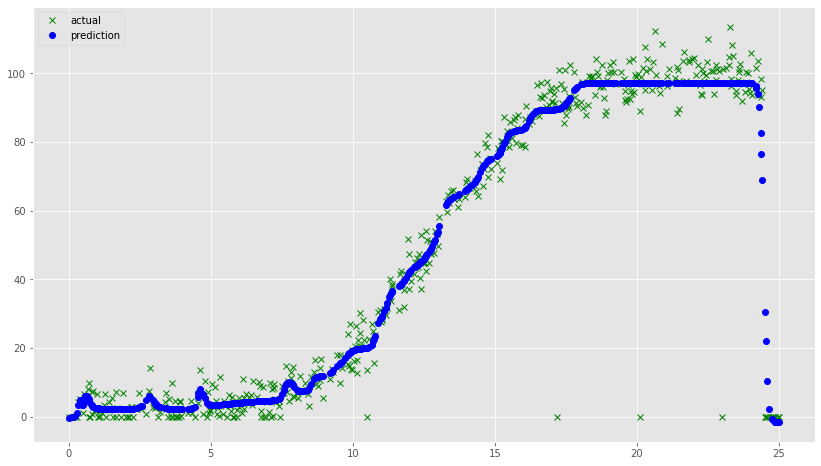

In [7]:
# Now let's see.
plt.plot(data['speed'], data['power'], 'gx', label='actual')
plt.plot(data['speed'], model.predict(data['speed']), 'bo',label='prediction')
plt.legend();

### Accuracy analysis
In theory, this is a really accurate data plot. As can be seen, all of the estimates are more or less contained in around the data set itself. Unfortunately, it is hard to get a completely accurate estimate due to the large number of outliers at the end. When we train the model, looping over it, you can see that the loss is gradually decreased. The loss is basically the prediction error of the neural network and it is used to calculate the gradient of the line on the plot. My end loss is between 70 and 80, which is a good result considering the number of outliers in the data set.